In [1]:
import sys
sys.path.append("../../post_proc")

import post_proc as pp
import pickle
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../../kernels")
import KernelGSin as gsk
import KernelGauss as gak

from matplotlib import cm

# GSK Adaptive 10^4 FE -> Memory/Time

In [2]:
# load data from file
path = "F:/FHV/Masterthesis/data_backup/MA_Data/time_experiment_3a/"

cipde0a_ex3a_10_4 = []
for i in range(20):
    cipde0a_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde0a_mpjagsk_rep_" + str(i) + ".json"))

cipde0b_ex3a_10_4 = []
for i in range(20):
    cipde0b_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde0b_mpjagsk_rep_" + str(i) + ".json"))

cipde1_ex3a_10_4 = []
for i in range(20):
    cipde1_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde1_mpjagsk_rep_" + str(i) + ".json"))
    
cipde2_ex3a_10_4 = []
for i in range(20):
    cipde2_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde2_mpjagsk_rep_" + str(i) + ".json"))
    
cipde3_ex3a_10_4 = []
for i in range(20):
    cipde3_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde3_mpjagsk_rep_" + str(i) + ".json"))

cipde4_ex3a_10_4 = []
for i in range(20):
    cipde4_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde4_mpjagsk_rep_" + str(i) + ".json"))
    
cipde5_ex3a_10_4 = []
for i in range(20):
    cipde5_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde5_mpjagsk_rep_" + str(i) + ".json"))
    
cipde6_ex3a_10_4 = []
for i in range(20):
    cipde6_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde6_mpjagsk_rep_" + str(i) + ".json"))
    
cipde7_ex3a_10_4 = []
for i in range(20):
    cipde7_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde7_mpjagsk_rep_" + str(i) + ".json"))
    
cipde8_ex3a_10_4 = []
for i in range(20):
    cipde8_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde8_mpjagsk_rep_" + str(i) + ".json"))
    
cipde9_ex3a_10_4 = []
for i in range(20):
    cipde9_ex3a_10_4.append(pp.loadExpObjectFast(path + "cipde9_mpjagsk_rep_" + str(i) + ".json"))

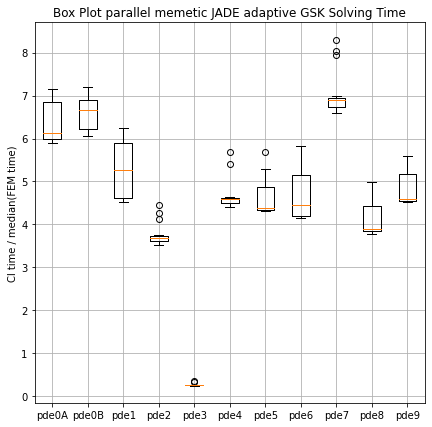

In [3]:
time_pde_0A_ex3a_10_4 = np.array([t["exec_time"] for t in cipde0a_ex3a_10_4])
time_pde_0B_ex3a_10_4 = np.array([t["exec_time"] for t in cipde0b_ex3a_10_4])
time_pde_1_ex3a_10_4  = np.array([t["exec_time"] for t in cipde1_ex3a_10_4])
time_pde_2_ex3a_10_4  = np.array([t["exec_time"] for t in cipde2_ex3a_10_4])
time_pde_3_ex3a_10_4  = np.array([t["exec_time"] for t in cipde3_ex3a_10_4])
time_pde_4_ex3a_10_4  = np.array([t["exec_time"] for t in cipde4_ex3a_10_4])
time_pde_5_ex3a_10_4  = np.array([t["exec_time"] for t in cipde5_ex3a_10_4])
time_pde_6_ex3a_10_4  = np.array([t["exec_time"] for t in cipde6_ex3a_10_4])
time_pde_7_ex3a_10_4  = np.array([t["exec_time"] for t in cipde7_ex3a_10_4])
time_pde_8_ex3a_10_4  = np.array([t["exec_time"] for t in cipde8_ex3a_10_4])
time_pde_9_ex3a_10_4  = np.array([t["exec_time"] for t in cipde9_ex3a_10_4])

with open("../_experiment_fem_base/fem_time_mean.txt", "r") as f:
    fem_time_results = f.read()

fem_time_results = [float(t) for t in fem_time_results[1:-1].split(",")]
t_data_ex3a = [time_pde_0A_ex3a_10_4/fem_time_results[0], 
               time_pde_0B_ex3a_10_4/fem_time_results[1], 
               time_pde_1_ex3a_10_4/fem_time_results[2],
               time_pde_2_ex3a_10_4/fem_time_results[3], 
               time_pde_3_ex3a_10_4/fem_time_results[4], 
               time_pde_4_ex3a_10_4/fem_time_results[5], 
               time_pde_5_ex3a_10_4/fem_time_results[6], 
               time_pde_6_ex3a_10_4/fem_time_results[7], 
               time_pde_7_ex3a_10_4/fem_time_results[8], 
               time_pde_8_ex3a_10_4/fem_time_results[9], 
               time_pde_9_ex3a_10_4/fem_time_results[10]]

fig, ax = plt.subplots(figsize=(7,7))
labels = ['pde0A', 'pde0B', 'pde1', 'pde2', 'pde3',\
          'pde4', 'pde5', 'pde6', 'pde7', 'pde8', 'pde9']
ax.boxplot(t_data_ex3a, labels=labels)
ax.set_title('Box Plot parallel memetic JADE adaptive GSK Solving Time')
ax.set_ylabel('CI time / median(FEM time)')
plt.grid()
plt.show()
fig.savefig("time_boxplot_ci_exp3a.pdf", bbox_inches='tight')

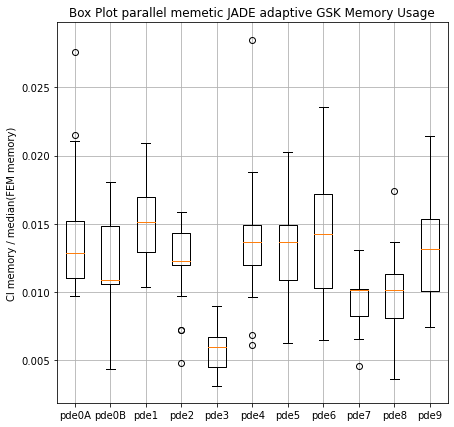

In [4]:
mem_pde_0A_ex3a_10_4 = np.array([t["mem_consumption"]/10**6 for t in cipde0a_ex3a_10_4])
mem_pde_0B_ex3a_10_4 = np.array([t["mem_consumption"]/10**6 for t in cipde0b_ex3a_10_4])
mem_pde_1_ex3a_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde1_ex3a_10_4])
mem_pde_2_ex3a_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde2_ex3a_10_4])
mem_pde_3_ex3a_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde3_ex3a_10_4])
mem_pde_4_ex3a_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde4_ex3a_10_4])
mem_pde_5_ex3a_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde5_ex3a_10_4])
mem_pde_6_ex3a_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde6_ex3a_10_4])
mem_pde_7_ex3a_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde7_ex3a_10_4])
mem_pde_8_ex3a_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde8_ex3a_10_4])
mem_pde_9_ex3a_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde9_ex3a_10_4])

with open("../_experiment_fem_base/fem_mem_mean.txt", "r") as f:
    fem_mem_results = f.read()

fem_mem_results = [float(t) for t in fem_mem_results[1:-1].split(",")]
m_data_ex3a_10_4 = [mem_pde_0A_ex3a_10_4/fem_mem_results[0], 
              mem_pde_0B_ex3a_10_4/fem_mem_results[1], 
              mem_pde_1_ex3a_10_4/fem_mem_results[2],
              mem_pde_2_ex3a_10_4/fem_mem_results[3], 
              mem_pde_3_ex3a_10_4/fem_mem_results[4], 
              mem_pde_4_ex3a_10_4/fem_mem_results[5], 
              mem_pde_5_ex3a_10_4/fem_mem_results[6], 
              mem_pde_6_ex3a_10_4/fem_mem_results[7], 
              mem_pde_7_ex3a_10_4/fem_mem_results[8], 
              mem_pde_8_ex3a_10_4/fem_mem_results[9], 
              mem_pde_9_ex3a_10_4/fem_mem_results[10]]

fig, ax = plt.subplots(figsize=(7,7))
labels = ['pde0A', 'pde0B', 'pde1', 'pde2', 'pde3',\
          'pde4', 'pde5', 'pde6', 'pde7', 'pde8', 'pde9']
ax.boxplot(m_data_ex3a_10_4, labels=labels)
ax.set_title('Box Plot parallel memetic JADE adaptive GSK Memory Usage')
ax.set_ylabel('CI memory / median(FEM memory)')
plt.grid()
plt.show()
fig.savefig("mem_boxplot_ci_exp3a.pdf", bbox_inches='tight')

# GSK Non-Adaptive 10^4 FE -> Memory/Time

In [5]:
# load data from file
path = "F:/FHV/Masterthesis/data_backup/MA_Data/time_experiment_3/"

cipde0a_ex3_10_4 = []
for i in range(20):
    cipde0a_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde0a_mpjgsk_rep_" + str(i) + ".json"))

cipde0b_ex3_10_4 = []
for i in range(20):
    cipde0b_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde0b_mpjgsk_rep_" + str(i) + ".json"))

cipde1_ex3_10_4 = []
for i in range(20):
    cipde1_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde1_mpjgsk_rep_" + str(i) + ".json"))
    
cipde2_ex3_10_4 = []
for i in range(20):
    cipde2_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde2_mpjgsk_rep_" + str(i) + ".json"))
    
cipde3_ex3_10_4 = []
for i in range(20):
    cipde3_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde3_mpjgsk_rep_" + str(i) + ".json"))

cipde4_ex3_10_4 = []
for i in range(20):
    cipde4_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde4_mpjgsk_rep_" + str(i) + ".json"))
    
cipde5_ex3_10_4 = []
for i in range(20):
    cipde5_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde5_mpjgsk_rep_" + str(i) + ".json"))
    
cipde6_ex3_10_4 = []
for i in range(20):
    cipde6_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde6_mpjgsk_rep_" + str(i) + ".json"))
    
cipde7_ex3_10_4 = []
for i in range(20):
    cipde7_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde7_mpjgsk_rep_" + str(i) + ".json"))
    
cipde8_ex3_10_4 = []
for i in range(20):
    cipde8_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde8_mpjgsk_rep_" + str(i) + ".json"))
    
cipde9_ex3_10_4 = []
for i in range(20):
    cipde9_ex3_10_4.append(pp.loadExpObjectFast(path + "cipde9_mpjgsk_rep_" + str(i) + ".json"))

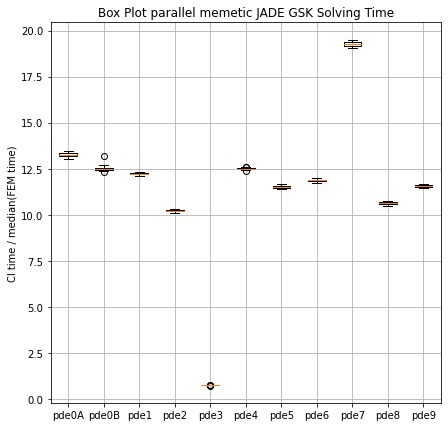

In [6]:
time_pde_0A_ex3_10_4 = np.array([t["exec_time"] for t in cipde0a_ex3_10_4])
time_pde_0B_ex3_10_4 = np.array([t["exec_time"] for t in cipde0b_ex3_10_4])
time_pde_1_ex3_10_4  = np.array([t["exec_time"] for t in cipde1_ex3_10_4])
time_pde_2_ex3_10_4  = np.array([t["exec_time"] for t in cipde2_ex3_10_4])
time_pde_3_ex3_10_4  = np.array([t["exec_time"] for t in cipde3_ex3_10_4])
time_pde_4_ex3_10_4  = np.array([t["exec_time"] for t in cipde4_ex3_10_4])
time_pde_5_ex3_10_4  = np.array([t["exec_time"] for t in cipde5_ex3_10_4])
time_pde_6_ex3_10_4  = np.array([t["exec_time"] for t in cipde6_ex3_10_4])
time_pde_7_ex3_10_4  = np.array([t["exec_time"] for t in cipde7_ex3_10_4])
time_pde_8_ex3_10_4  = np.array([t["exec_time"] for t in cipde8_ex3_10_4])
time_pde_9_ex3_10_4  = np.array([t["exec_time"] for t in cipde9_ex3_10_4])

with open("../_experiment_fem_base/fem_time_mean.txt", "r") as f:
    fem_time_results = f.read()

fem_time_results = [float(t) for t in fem_time_results[1:-1].split(",")]
t_data_ex3 = [time_pde_0A_ex3_10_4/fem_time_results[0], 
          time_pde_0B_ex3_10_4/fem_time_results[1], 
          time_pde_1_ex3_10_4/fem_time_results[2],
          time_pde_2_ex3_10_4/fem_time_results[3], 
          time_pde_3_ex3_10_4/fem_time_results[4], 
          time_pde_4_ex3_10_4/fem_time_results[5], 
          time_pde_5_ex3_10_4/fem_time_results[6], 
          time_pde_6_ex3_10_4/fem_time_results[7], 
          time_pde_7_ex3_10_4/fem_time_results[8], 
          time_pde_8_ex3_10_4/fem_time_results[9], 
          time_pde_9_ex3_10_4/fem_time_results[10]]


fig, ax = plt.subplots(figsize=(7,7))
labels = ['pde0A', 'pde0B', 'pde1', 'pde2', 'pde3',\
          'pde4', 'pde5', 'pde6', 'pde7', 'pde8', 'pde9']
ax.boxplot(t_data_ex3, labels=labels)
ax.set_title('Box Plot parallel memetic JADE GSK Solving Time')
ax.set_ylabel('CI time / median(FEM time)')
plt.grid()
plt.show()
fig.savefig("time_boxplot_ci_exp3.pdf", bbox_inches='tight')

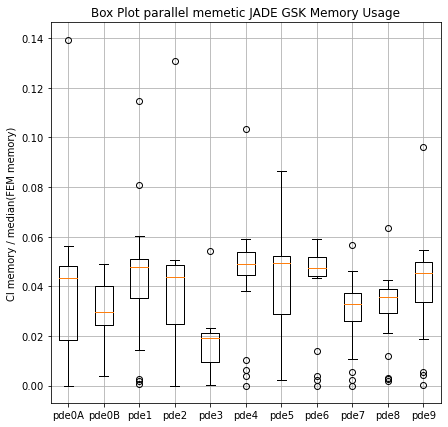

In [7]:
mem_pde_0A_ex3_10_4 = np.array([t["mem_consumption"]/10**6 for t in cipde0a_ex3_10_4])
mem_pde_0B_ex3_10_4 = np.array([t["mem_consumption"]/10**6 for t in cipde0b_ex3_10_4])
mem_pde_1_ex3_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde1_ex3_10_4])
mem_pde_2_ex3_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde2_ex3_10_4])
mem_pde_3_ex3_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde3_ex3_10_4])
mem_pde_4_ex3_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde4_ex3_10_4])
mem_pde_5_ex3_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde5_ex3_10_4])
mem_pde_6_ex3_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde6_ex3_10_4])
mem_pde_7_ex3_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde7_ex3_10_4])
mem_pde_8_ex3_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde8_ex3_10_4])
mem_pde_9_ex3_10_4  = np.array([t["mem_consumption"]/10**6 for t in cipde9_ex3_10_4])

with open("../_experiment_fem_base/fem_mem_mean.txt", "r") as f:
    fem_mem_results = f.read()

fem_mem_results = [float(t) for t in fem_mem_results[1:-1].split(",")]
m_data_ex3_10_4 = [mem_pde_0A_ex3_10_4/fem_mem_results[0], 
              mem_pde_0B_ex3_10_4/fem_mem_results[1], 
              mem_pde_1_ex3_10_4/fem_mem_results[2],
              mem_pde_2_ex3_10_4/fem_mem_results[3], 
              mem_pde_3_ex3_10_4/fem_mem_results[4], 
              mem_pde_4_ex3_10_4/fem_mem_results[5], 
              mem_pde_5_ex3_10_4/fem_mem_results[6], 
              mem_pde_6_ex3_10_4/fem_mem_results[7], 
              mem_pde_7_ex3_10_4/fem_mem_results[8], 
              mem_pde_8_ex3_10_4/fem_mem_results[9], 
              mem_pde_9_ex3_10_4/fem_mem_results[10]]

fig, ax = plt.subplots(figsize=(7,7))
labels = ['pde0A', 'pde0B', 'pde1', 'pde2', 'pde3',\
          'pde4', 'pde5', 'pde6', 'pde7', 'pde8', 'pde9']
ax.boxplot(m_data_ex3_10_4, labels=labels)
ax.set_title('Box Plot parallel memetic JADE GSK Memory Usage')
ax.set_ylabel('CI memory / median(FEM memory)')
plt.grid()
plt.show()
fig.savefig("mem_boxplot_ci_exp3.pdf", bbox_inches='tight')

# GSK Adaptive 10^6 FE

In [8]:
# load experiment 0 data from file
path = "D:/Nicolai/MA_Data/experiment_3a/"

cipde0a_ex3a_10_6 = []
for i in range(20):
    cipde0a_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde0a_mpjagsk_rep_" + str(i) + ".json"))

cipde0b_ex3a_10_6 = []
for i in range(20):
    cipde0b_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde0b_mpjagsk_rep_" + str(i) + ".json"))

cipde1_ex3a_10_6 = []
for i in range(20):
    cipde1_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde1_mpjagsk_rep_" + str(i) + ".json"))
    
cipde2_ex3a_10_6 = []
for i in range(20):
    cipde2_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde2_mpjagsk_rep_" + str(i) + ".json"))
    
cipde3_ex3a_10_6 = []
for i in range(20):
    cipde3_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde3_mpjagsk_rep_" + str(i) + ".json"))
    
cipde4_ex3a_10_6 = []
for i in range(20):
    cipde4_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde4_mpjagsk_rep_" + str(i) + ".json"))
    
cipde5_ex3a_10_6 = []
for i in range(20):
    cipde5_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde5_mpjagsk_rep_" + str(i) + ".json"))
    
cipde6_ex3a_10_6 = []
for i in range(20):
    cipde6_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde6_mpjagsk_rep_" + str(i) + ".json"))
    
cipde7_ex3a_10_6 = []
for i in range(20):
    cipde7_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde7_mpjagsk_rep_" + str(i) + ".json"))
    
cipde8_ex3a_10_6 = []
for i in range(20):
    cipde8_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde8_mpjagsk_rep_" + str(i) + ".json"))
    
cipde9_ex3a_10_6 = []
for i in range(20):
    cipde9_ex3a_10_6.append(pp.loadExpObjectFast(path + "cipde9_mpjagsk_rep_" + str(i) + ".json"))
 

In [9]:
pde_0A_data_ex3a_10_6 = [t["normL2"] for t in cipde0a_ex3a_10_6]
pde_0B_data_ex3a_10_6 = [t["normL2"] for t in cipde0b_ex3a_10_6]
pde_1_data_ex3a_10_6 = [t["normL2"] for t in cipde1_ex3a_10_6]
pde_2_data_ex3a_10_6 = [t["normL2"] for t in cipde2_ex3a_10_6]
pde_3_data_ex3a_10_6 = [t["normL2"] for t in cipde3_ex3a_10_6]
pde_4_data_ex3a_10_6 = [t["normL2"] for t in cipde4_ex3a_10_6]
pde_5_data_ex3a_10_6 = [t["normL2"] for t in cipde5_ex3a_10_6]
pde_6_data_ex3a_10_6 = [t["normL2"] for t in cipde6_ex3a_10_6]
pde_7_data_ex3a_10_6 = [t["normL2"] for t in cipde7_ex3a_10_6]
pde_8_data_ex3a_10_6 = [t["normL2"] for t in cipde8_ex3a_10_6]
pde_9_data_ex3a_10_6 = [t["normL2"] for t in cipde9_ex3a_10_6]

dist_pde_0A_ex3a_10_6 = np.mean(pde_0A_data_ex3a_10_6)
dist_pde_0B_ex3a_10_6 = np.mean(pde_0B_data_ex3a_10_6)
dist_pde_1_ex3a_10_6  = np.mean(pde_1_data_ex3a_10_6)
dist_pde_2_ex3a_10_6  = np.mean(pde_2_data_ex3a_10_6)
dist_pde_3_ex3a_10_6  = np.mean(pde_3_data_ex3a_10_6)
dist_pde_4_ex3a_10_6  = np.mean(pde_4_data_ex3a_10_6)
dist_pde_5_ex3a_10_6  = np.mean(pde_5_data_ex3a_10_6)
dist_pde_6_ex3a_10_6  = np.mean(pde_6_data_ex3a_10_6)
dist_pde_7_ex3a_10_6  = np.mean(pde_7_data_ex3a_10_6)
dist_pde_8_ex3a_10_6  = np.mean(pde_8_data_ex3a_10_6)
dist_pde_9_ex3a_10_6  = np.mean(pde_9_data_ex3a_10_6)

std_pde_0A_ex3a_10_6 = np.std(pde_0A_data_ex3a_10_6)
std_pde_0B_ex3a_10_6 = np.std(pde_0B_data_ex3a_10_6)
std_pde_1_ex3a_10_6  = np.std(pde_1_data_ex3a_10_6)
std_pde_2_ex3a_10_6  = np.std(pde_2_data_ex3a_10_6)
std_pde_3_ex3a_10_6  = np.std(pde_3_data_ex3a_10_6)
std_pde_4_ex3a_10_6  = np.std(pde_4_data_ex3a_10_6)
std_pde_5_ex3a_10_6  = np.std(pde_5_data_ex3a_10_6)
std_pde_6_ex3a_10_6  = np.std(pde_6_data_ex3a_10_6)
std_pde_7_ex3a_10_6  = np.std(pde_7_data_ex3a_10_6)
std_pde_8_ex3a_10_6  = np.std(pde_8_data_ex3a_10_6)
std_pde_9_ex3a_10_6  = np.std(pde_9_data_ex3a_10_6)

med_pde_0A_ex3a_10_6 = np.median(pde_0A_data_ex3a_10_6)
med_pde_0B_ex3a_10_6 = np.median(pde_0B_data_ex3a_10_6)
med_pde_1_ex3a_10_6 = np.median(pde_1_data_ex3a_10_6)
med_pde_2_ex3a_10_6 = np.median(pde_2_data_ex3a_10_6)
med_pde_3_ex3a_10_6 = np.median(pde_3_data_ex3a_10_6)
med_pde_4_ex3a_10_6 = np.median(pde_4_data_ex3a_10_6)
med_pde_5_ex3a_10_6 = np.median(pde_5_data_ex3a_10_6)
med_pde_6_ex3a_10_6 = np.median(pde_6_data_ex3a_10_6)
med_pde_7_ex3a_10_6 = np.median(pde_7_data_ex3a_10_6)
med_pde_8_ex3a_10_6 = np.median(pde_8_data_ex3a_10_6)
med_pde_9_ex3a_10_6 = np.median(pde_9_data_ex3a_10_6)

# GAK Adaptive 10^6 FE

In [10]:
# load experiment 1 data from file
path = "D:/Nicolai/MA_Data/experiment_2/"

cipde0a_ex2_10_6 = []
for i in range(20):
    cipde0a_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde0a_mpja_rep_" + str(i) + ".json"))

cipde0b_ex2_10_6 = []
for i in range(20):
    cipde0b_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde0b_mpja_rep_" + str(i) + ".json"))

cipde1_ex2_10_6 = []
for i in range(20):
    cipde1_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde1_mpja_rep_" + str(i) + ".json"))
    
cipde2_ex2_10_6 = []
for i in range(20):
    cipde2_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde2_mpja_rep_" + str(i) + ".json"))
    
cipde3_ex2_10_6 = []
for i in range(20):
    cipde3_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde3_mpja_rep_" + str(i) + ".json"))
    
cipde4_ex2_10_6 = []
for i in range(20):
    cipde4_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde4_mpja_rep_" + str(i) + ".json"))
    
cipde5_ex2_10_6 = []
for i in range(20):
    cipde5_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde5_mpja_rep_" + str(i) + ".json"))
    
cipde6_ex2_10_6 = []
for i in range(20):
    cipde6_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde6_mpja_rep_" + str(i) + ".json"))
    
cipde7_ex2_10_6 = []
for i in range(20):
    cipde7_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde7_mpja_rep_" + str(i) + ".json"))
    
cipde8_ex2_10_6 = []
for i in range(20):
    cipde8_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde8_mpja_rep_" + str(i) + ".json"))
    
cipde9_ex2_10_6 = []
for i in range(20):
    cipde9_ex2_10_6.append(pp.loadExpObjectFast(path + "cipde9_mpja_rep_" + str(i) + ".json"))
 

In [11]:
pde_0A_data_ex2_10_6 = [t["normL2"] for t in cipde0a_ex2_10_6]
pde_0B_data_ex2_10_6 = [t["normL2"] for t in cipde0b_ex2_10_6]
pde_1_data_ex2_10_6 = [t["normL2"] for t in cipde1_ex2_10_6]
pde_2_data_ex2_10_6 = [t["normL2"] for t in cipde2_ex2_10_6]
pde_3_data_ex2_10_6 = [t["normL2"] for t in cipde3_ex2_10_6]
pde_4_data_ex2_10_6 = [t["normL2"] for t in cipde4_ex2_10_6]
pde_5_data_ex2_10_6 = [t["normL2"] for t in cipde5_ex2_10_6]
pde_6_data_ex2_10_6 = [t["normL2"] for t in cipde6_ex2_10_6]
pde_7_data_ex2_10_6 = [t["normL2"] for t in cipde7_ex2_10_6]
pde_8_data_ex2_10_6 = [t["normL2"] for t in cipde8_ex2_10_6]
pde_9_data_ex2_10_6 = [t["normL2"] for t in cipde9_ex2_10_6]

dist_pde_0A_ex2_10_6 = np.mean(pde_0A_data_ex2_10_6)
dist_pde_0B_ex2_10_6 = np.mean(pde_0B_data_ex2_10_6)
dist_pde_1_ex2_10_6  = np.mean(pde_1_data_ex2_10_6)
dist_pde_2_ex2_10_6  = np.mean(pde_2_data_ex2_10_6)
dist_pde_3_ex2_10_6  = np.mean(pde_3_data_ex2_10_6)
dist_pde_4_ex2_10_6  = np.mean(pde_4_data_ex2_10_6)
dist_pde_5_ex2_10_6  = np.mean(pde_5_data_ex2_10_6)
dist_pde_6_ex2_10_6  = np.mean(pde_6_data_ex2_10_6)
dist_pde_7_ex2_10_6  = np.mean(pde_7_data_ex2_10_6)
dist_pde_8_ex2_10_6  = np.mean(pde_8_data_ex2_10_6)
dist_pde_9_ex2_10_6  = np.mean(pde_9_data_ex2_10_6)

std_pde_0A_ex2_10_6 = np.std(pde_0A_data_ex2_10_6)
std_pde_0B_ex2_10_6 = np.std(pde_0B_data_ex2_10_6)
std_pde_1_ex2_10_6  = np.std(pde_1_data_ex2_10_6)
std_pde_2_ex2_10_6  = np.std(pde_2_data_ex2_10_6)
std_pde_3_ex2_10_6  = np.std(pde_3_data_ex2_10_6)
std_pde_4_ex2_10_6  = np.std(pde_4_data_ex2_10_6)
std_pde_5_ex2_10_6  = np.std(pde_5_data_ex2_10_6)
std_pde_6_ex2_10_6  = np.std(pde_6_data_ex2_10_6)
std_pde_7_ex2_10_6  = np.std(pde_7_data_ex2_10_6)
std_pde_8_ex2_10_6  = np.std(pde_8_data_ex2_10_6)
std_pde_9_ex2_10_6  = np.std(pde_9_data_ex2_10_6)

med_pde_0A_ex2_10_6 = np.median(pde_0A_data_ex2_10_6)
med_pde_0B_ex2_10_6 = np.median(pde_0B_data_ex2_10_6)
med_pde_1_ex2_10_6 = np.median(pde_1_data_ex2_10_6)
med_pde_2_ex2_10_6 = np.median(pde_2_data_ex2_10_6)
med_pde_3_ex2_10_6 = np.median(pde_3_data_ex2_10_6)
med_pde_4_ex2_10_6 = np.median(pde_4_data_ex2_10_6)
med_pde_5_ex2_10_6 = np.median(pde_5_data_ex2_10_6)
med_pde_6_ex2_10_6 = np.median(pde_6_data_ex2_10_6)
med_pde_7_ex2_10_6 = np.median(pde_7_data_ex2_10_6)
med_pde_8_ex2_10_6 = np.median(pde_8_data_ex2_10_6)
med_pde_9_ex2_10_6 = np.median(pde_9_data_ex2_10_6)

# GSK Adaptive - GAK Adaptive Comparison

In [12]:
pde_0A_stat_10_6 = pp.statsWilcoxon(pde_0A_data_ex3a_10_6, pde_0A_data_ex2_10_6)
pde_0B_stat_10_6 = pp.statsWilcoxon(pde_0B_data_ex3a_10_6, pde_0B_data_ex2_10_6)
pde_1_stat_10_6  = pp.statsWilcoxon(pde_1_data_ex3a_10_6,  pde_1_data_ex2_10_6)
pde_2_stat_10_6  = pp.statsWilcoxon(pde_2_data_ex3a_10_6,  pde_2_data_ex2_10_6)
pde_3_stat_10_6  = pp.statsWilcoxon(pde_3_data_ex3a_10_6,  pde_3_data_ex2_10_6)
pde_4_stat_10_6  = pp.statsWilcoxon(pde_4_data_ex3a_10_6,  pde_4_data_ex2_10_6)
pde_5_stat_10_6  = pp.statsWilcoxon(pde_5_data_ex3a_10_6,  pde_5_data_ex2_10_6)
pde_6_stat_10_6  = pp.statsWilcoxon(pde_6_data_ex3a_10_6,  pde_6_data_ex2_10_6)
pde_7_stat_10_6  = pp.statsWilcoxon(pde_7_data_ex3a_10_6,  pde_7_data_ex2_10_6)
pde_8_stat_10_6  = pp.statsWilcoxon(pde_8_data_ex3a_10_6,  pde_8_data_ex2_10_6)
pde_9_stat_10_6  = pp.statsWilcoxon(pde_9_data_ex3a_10_6,  pde_9_data_ex2_10_6)

print("\\gls{pde} 0A & " + "%.4f" % dist_pde_0A_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_0A_ex2_10_6 + " & " + "%.4f" % med_pde_0A_ex2_10_6 + " & " + "%.4f" % dist_pde_0A_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_0A_ex3a_10_6 + " & " + "%.4f" % med_pde_0A_ex3a_10_6 + " & " + pde_0A_stat_10_6)
print("\\gls{pde} 0B & " + "%.4f" % dist_pde_0B_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_0B_ex2_10_6 + " & " + "%.4f" % med_pde_0B_ex2_10_6 + " & " + "%.4f" % dist_pde_0B_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_0B_ex3a_10_6 + " & " + "%.4f" % med_pde_0B_ex3a_10_6 + " & " + pde_0B_stat_10_6)
print("\\gls{pde} 1 & " + "%.4f" % dist_pde_1_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_1_ex2_10_6 + " & " + "%.4f" % med_pde_1_ex2_10_6 + " & " + "%.4f" % dist_pde_1_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_1_ex3a_10_6 + " & " + "%.4f" % med_pde_1_ex3a_10_6 + " & " + pde_1_stat_10_6)
print("\\gls{pde} 2 & " + "%.4f" % dist_pde_2_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_2_ex2_10_6 + " & " + "%.4f" % med_pde_2_ex2_10_6 + " & " + "%.4f" % dist_pde_2_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_2_ex3a_10_6 + " & " + "%.4f" % med_pde_2_ex3a_10_6 + " & " + pde_2_stat_10_6)
print("\\gls{pde} 3 & " + "%.4f" % dist_pde_3_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_3_ex2_10_6 + " & " + "%.4f" % med_pde_3_ex2_10_6 + " & " + "%.4f" % dist_pde_3_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_3_ex3a_10_6 + " & " + "%.4f" % med_pde_3_ex3a_10_6 + " & " + pde_3_stat_10_6)
print("\\gls{pde} 4 & " + "%.4f" % dist_pde_4_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_4_ex2_10_6 + " & " + "%.4f" % med_pde_4_ex2_10_6 + " & " + "%.4f" % dist_pde_4_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_4_ex3a_10_6 + " & " + "%.4f" % med_pde_4_ex3a_10_6 + " & " + pde_4_stat_10_6)
print("\\gls{pde} 5 & " + "%.4f" % dist_pde_5_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_5_ex2_10_6 + " & " + "%.4f" % med_pde_5_ex2_10_6 + " & " + "%.4f" % dist_pde_5_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_5_ex3a_10_6 + " & " + "%.4f" % med_pde_5_ex3a_10_6 + " & " + pde_5_stat_10_6)
print("\\gls{pde} 6 & " + "%.4f" % dist_pde_6_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_6_ex2_10_6 + " & " + "%.4f" % med_pde_6_ex2_10_6 + " & " + "%.4f" % dist_pde_6_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_6_ex3a_10_6 + " & " + "%.4f" % med_pde_6_ex3a_10_6 + " & " + pde_6_stat_10_6)
print("\\gls{pde} 7 & " + "%.4f" % dist_pde_7_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_7_ex2_10_6 + " & " + "%.4f" % med_pde_7_ex2_10_6 + " & " + "%.4f" % dist_pde_7_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_7_ex3a_10_6 + " & " + "%.4f" % med_pde_7_ex3a_10_6 + " & " + pde_7_stat_10_6)
print("\\gls{pde} 8 & " + "%.4f" % dist_pde_8_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_8_ex2_10_6 + " & " + "%.4f" % med_pde_8_ex2_10_6 + " & " + "%.4f" % dist_pde_8_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_8_ex3a_10_6 + " & " + "%.4f" % med_pde_8_ex3a_10_6 + " & " + pde_8_stat_10_6)
print("\\gls{pde} 9 & " + "%.4f" % dist_pde_9_ex2_10_6 + " $\pm$ " + "%.4f" % std_pde_9_ex2_10_6 + " & " + "%.4f" % med_pde_9_ex2_10_6 + " & " + "%.4f" % dist_pde_9_ex3a_10_6 + " $\pm$ " + "%.4f" % std_pde_9_ex3a_10_6 + " & " + "%.4f" % med_pde_9_ex3a_10_6 + " & " + pde_9_stat_10_6)

\gls{pde} 0A & 0.0000 $\pm$ 0.0000 & 0.0000 & 1.4599 $\pm$ 0.8231 & 1.5663 & sig. worse
\gls{pde} 0B & 0.2380 $\pm$ 0.0572 & 0.2607 & 0.0742 $\pm$ 0.0253 & 0.0874 & sig. better
\gls{pde} 1 & 0.0116 $\pm$ 0.0061 & 0.0084 & 0.0967 $\pm$ 0.1026 & 0.0557 & sig. worse
\gls{pde} 2 & 0.0735 $\pm$ 0.0358 & 0.1034 & 0.0498 $\pm$ 0.0240 & 0.0449 & sig. better
\gls{pde} 3 & 0.1731 $\pm$ 0.0395 & 0.1822 & 0.0263 $\pm$ 0.0748 & 0.0000 & sig. better
\gls{pde} 4 & 0.0707 $\pm$ 0.0053 & 0.0720 & 0.1264 $\pm$ 0.0885 & 0.0788 & sig. worse
\gls{pde} 5 & 122.6312 $\pm$ 372.5676 & 1.1643 & 0.5750 $\pm$ 0.2604 & 0.4914 & sig. better
\gls{pde} 6 & 0.4428 $\pm$ 1.0980 & 0.0000 & 2.2943 $\pm$ 1.8771 & 3.6443 & sig. worse
\gls{pde} 7 & 0.0513 $\pm$ 0.0442 & 0.0231 & 0.0332 $\pm$ 0.0100 & 0.0366 & unsig. undecided
\gls{pde} 8 & 0.2144 $\pm$ 0.0044 & 0.2128 & 0.2182 $\pm$ 0.0015 & 0.2183 & sig. worse
\gls{pde} 9 & 0.0483 $\pm$ 0.0149 & 0.0468 & 0.0405 $\pm$ 0.0118 & 0.0366 & unsig. better


# GSK Non-Adaptive 10^6 FE

In [13]:
# load experiment 0 data from file
path = "D:/Nicolai/MA_Data/experiment_3/"

cipde0a_ex3_10_6 = []
for i in range(20):
    cipde0a_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde0a_mpjgsk_rep_" + str(i) + ".json"))

cipde0b_ex3_10_6 = []
for i in range(20):
    cipde0b_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde0b_mpjgsk_rep_" + str(i) + ".json"))

cipde1_ex3_10_6 = []
for i in range(20):
    cipde1_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde1_mpjgsk_rep_" + str(i) + ".json"))
    
cipde2_ex3_10_6 = []
for i in range(20):
    cipde2_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde2_mpjgsk_rep_" + str(i) + ".json"))
    
cipde3_ex3_10_6 = []
for i in range(20):
    cipde3_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde3_mpjgsk_rep_" + str(i) + ".json"))
    
cipde4_ex3_10_6 = []
for i in range(20):
    cipde4_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde4_mpjgsk_rep_" + str(i) + ".json"))
    
cipde5_ex3_10_6 = []
for i in range(20):
    cipde5_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde5_mpjgsk_rep_" + str(i) + ".json"))
    
cipde6_ex3_10_6 = []
for i in range(20):
    cipde6_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde6_mpjgsk_rep_" + str(i) + ".json"))
    
cipde7_ex3_10_6 = []
for i in range(20):
    cipde7_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde7_mpjgsk_rep_" + str(i) + ".json"))
    
cipde8_ex3_10_6 = []
for i in range(20):
    cipde8_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde8_mpjgsk_rep_" + str(i) + ".json"))
    
cipde9_ex3_10_6 = []
for i in range(20):
    cipde9_ex3_10_6.append(pp.loadExpObjectFast(path + "cipde9_mpjgsk_rep_" + str(i) + ".json"))

In [14]:
pde_0A_data_ex3_10_6 = [t["normL2"] for t in cipde0a_ex3_10_6]
pde_0B_data_ex3_10_6 = [t["normL2"] for t in cipde0b_ex3_10_6]
pde_1_data_ex3_10_6 = [t["normL2"] for t in cipde1_ex3_10_6]
pde_2_data_ex3_10_6 = [t["normL2"] for t in cipde2_ex3_10_6]
pde_3_data_ex3_10_6 = [t["normL2"] for t in cipde3_ex3_10_6]
pde_4_data_ex3_10_6 = [t["normL2"] for t in cipde4_ex3_10_6]
pde_5_data_ex3_10_6 = [t["normL2"] for t in cipde5_ex3_10_6]
pde_6_data_ex3_10_6 = [t["normL2"] for t in cipde6_ex3_10_6]
pde_7_data_ex3_10_6 = [t["normL2"] for t in cipde7_ex3_10_6]
pde_8_data_ex3_10_6 = [t["normL2"] for t in cipde8_ex3_10_6]
pde_9_data_ex3_10_6 = [t["normL2"] for t in cipde9_ex3_10_6]

dist_pde_0A_ex3_10_6 = np.mean(pde_0A_data_ex3_10_6)
dist_pde_0B_ex3_10_6 = np.mean(pde_0B_data_ex3_10_6)
dist_pde_1_ex3_10_6  = np.mean(pde_1_data_ex3_10_6)
dist_pde_2_ex3_10_6  = np.mean(pde_2_data_ex3_10_6)
dist_pde_3_ex3_10_6  = np.mean(pde_3_data_ex3_10_6)
dist_pde_4_ex3_10_6  = np.mean(pde_4_data_ex3_10_6)
dist_pde_5_ex3_10_6  = np.mean(pde_5_data_ex3_10_6)
dist_pde_6_ex3_10_6  = np.mean(pde_6_data_ex3_10_6)
dist_pde_7_ex3_10_6  = np.mean(pde_7_data_ex3_10_6)
dist_pde_8_ex3_10_6  = np.mean(pde_8_data_ex3_10_6)
dist_pde_9_ex3_10_6  = np.mean(pde_9_data_ex3_10_6)

std_pde_0A_ex3_10_6 = np.std(pde_0A_data_ex3_10_6)
std_pde_0B_ex3_10_6 = np.std(pde_0B_data_ex3_10_6)
std_pde_1_ex3_10_6  = np.std(pde_1_data_ex3_10_6)
std_pde_2_ex3_10_6  = np.std(pde_2_data_ex3_10_6)
std_pde_3_ex3_10_6  = np.std(pde_3_data_ex3_10_6)
std_pde_4_ex3_10_6  = np.std(pde_4_data_ex3_10_6)
std_pde_5_ex3_10_6  = np.std(pde_5_data_ex3_10_6)
std_pde_6_ex3_10_6  = np.std(pde_6_data_ex3_10_6)
std_pde_7_ex3_10_6  = np.std(pde_7_data_ex3_10_6)
std_pde_8_ex3_10_6  = np.std(pde_8_data_ex3_10_6)
std_pde_9_ex3_10_6  = np.std(pde_9_data_ex3_10_6)

med_pde_0A_ex3_10_6 = np.median(pde_0A_data_ex3_10_6)
med_pde_0B_ex3_10_6 = np.median(pde_0B_data_ex3_10_6)
med_pde_1_ex3_10_6 = np.median(pde_1_data_ex3_10_6)
med_pde_2_ex3_10_6 = np.median(pde_2_data_ex3_10_6)
med_pde_3_ex3_10_6 = np.median(pde_3_data_ex3_10_6)
med_pde_4_ex3_10_6 = np.median(pde_4_data_ex3_10_6)
med_pde_5_ex3_10_6 = np.median(pde_5_data_ex3_10_6)
med_pde_6_ex3_10_6 = np.median(pde_6_data_ex3_10_6)
med_pde_7_ex3_10_6 = np.median(pde_7_data_ex3_10_6)
med_pde_8_ex3_10_6 = np.median(pde_8_data_ex3_10_6)
med_pde_9_ex3_10_6 = np.median(pde_9_data_ex3_10_6)

# GAK Non-Adaptive 10^6 FE

In [15]:
# load experiment 1 data from file
path = "F:/FHV/Masterthesis/data_backup/MA_Data/experiment_1/"

cipde0a_ex1_10_6 = []
for i in range(20):
    cipde0a_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde0a_mpj_rep_" + str(i) + ".json"))

cipde0b_ex1_10_6 = []
for i in range(20):
    cipde0b_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde0b_mpj_rep_" + str(i) + ".json"))

cipde1_ex1_10_6 = []
for i in range(20):
    cipde1_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde1_mpj_rep_" + str(i) + ".json"))
    
cipde2_ex1_10_6 = []
for i in range(20):
    cipde2_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde2_mpj_rep_" + str(i) + ".json"))
    
cipde3_ex1_10_6 = []
for i in range(20):
    cipde3_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde3_mpj_rep_" + str(i) + ".json"))
    
cipde4_ex1_10_6 = []
for i in range(20):
    cipde4_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde4_mpj_rep_" + str(i) + ".json"))
    
cipde5_ex1_10_6 = []
for i in range(20):
    cipde5_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde5_mpj_rep_" + str(i) + ".json"))
    
cipde6_ex1_10_6 = []
for i in range(20):
    cipde6_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde6_mpj_rep_" + str(i) + ".json"))
    
cipde7_ex1_10_6 = []
for i in range(20):
    cipde7_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde7_mpj_rep_" + str(i) + ".json"))
    
cipde8_ex1_10_6 = []
for i in range(20):
    cipde8_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde8_mpj_rep_" + str(i) + ".json"))
    
cipde9_ex1_10_6 = []
for i in range(20):
    cipde9_ex1_10_6.append(pp.loadExpObjectFast(path + "cipde9_mpj_rep_" + str(i) + ".json"))
 

# GSK Non-Adaptive - GAK Non-Adaptive Comparison

In [16]:
pde_0A_data_ex1_10_6 = [t["normL2"] for t in cipde0a_ex1_10_6]
pde_0B_data_ex1_10_6 = [t["normL2"] for t in cipde0b_ex1_10_6]
pde_1_data_ex1_10_6 = [t["normL2"] for t in cipde1_ex1_10_6]
pde_2_data_ex1_10_6 = [t["normL2"] for t in cipde2_ex1_10_6]
pde_3_data_ex1_10_6 = [t["normL2"] for t in cipde3_ex1_10_6]
pde_4_data_ex1_10_6 = [t["normL2"] for t in cipde4_ex1_10_6]
pde_5_data_ex1_10_6 = [t["normL2"] for t in cipde5_ex1_10_6]
pde_6_data_ex1_10_6 = [t["normL2"] for t in cipde6_ex1_10_6]
pde_7_data_ex1_10_6 = [t["normL2"] for t in cipde7_ex1_10_6]
pde_8_data_ex1_10_6 = [t["normL2"] for t in cipde8_ex1_10_6]
pde_9_data_ex1_10_6 = [t["normL2"] for t in cipde9_ex1_10_6]

dist_pde_0A_ex1_10_6 = np.mean(pde_0A_data_ex1_10_6)
dist_pde_0B_ex1_10_6 = np.mean(pde_0B_data_ex1_10_6)
dist_pde_1_ex1_10_6  = np.mean(pde_1_data_ex1_10_6)
dist_pde_2_ex1_10_6  = np.mean(pde_2_data_ex1_10_6)
dist_pde_3_ex1_10_6  = np.mean(pde_3_data_ex1_10_6)
dist_pde_4_ex1_10_6  = np.mean(pde_4_data_ex1_10_6)
dist_pde_5_ex1_10_6  = np.mean(pde_5_data_ex1_10_6)
dist_pde_6_ex1_10_6  = np.mean(pde_6_data_ex1_10_6)
dist_pde_7_ex1_10_6  = np.mean(pde_7_data_ex1_10_6)
dist_pde_8_ex1_10_6  = np.mean(pde_8_data_ex1_10_6)
dist_pde_9_ex1_10_6  = np.mean(pde_9_data_ex1_10_6)

std_pde_0A_ex1_10_6 = np.std(pde_0A_data_ex1_10_6)
std_pde_0B_ex1_10_6 = np.std(pde_0B_data_ex1_10_6)
std_pde_1_ex1_10_6  = np.std(pde_1_data_ex1_10_6)
std_pde_2_ex1_10_6  = np.std(pde_2_data_ex1_10_6)
std_pde_3_ex1_10_6  = np.std(pde_3_data_ex1_10_6)
std_pde_4_ex1_10_6  = np.std(pde_4_data_ex1_10_6)
std_pde_5_ex1_10_6  = np.std(pde_5_data_ex1_10_6)
std_pde_6_ex1_10_6  = np.std(pde_6_data_ex1_10_6)
std_pde_7_ex1_10_6  = np.std(pde_7_data_ex1_10_6)
std_pde_8_ex1_10_6  = np.std(pde_8_data_ex1_10_6)
std_pde_9_ex1_10_6  = np.std(pde_9_data_ex1_10_6)

med_pde_0A_ex1_10_6 = np.median(pde_0A_data_ex1_10_6)
med_pde_0B_ex1_10_6 = np.median(pde_0B_data_ex1_10_6)
med_pde_1_ex1_10_6 = np.median(pde_1_data_ex1_10_6)
med_pde_2_ex1_10_6 = np.median(pde_2_data_ex1_10_6)
med_pde_3_ex1_10_6 = np.median(pde_3_data_ex1_10_6)
med_pde_4_ex1_10_6 = np.median(pde_4_data_ex1_10_6)
med_pde_5_ex1_10_6 = np.median(pde_5_data_ex1_10_6)
med_pde_6_ex1_10_6 = np.median(pde_6_data_ex1_10_6)
med_pde_7_ex1_10_6 = np.median(pde_7_data_ex1_10_6)
med_pde_8_ex1_10_6 = np.median(pde_8_data_ex1_10_6)
med_pde_9_ex1_10_6 = np.median(pde_9_data_ex1_10_6)

In [17]:
pde_0A_stat_10_6 = pp.statsWilcoxon(pde_0A_data_ex3_10_6, pde_0A_data_ex1_10_6)
pde_0B_stat_10_6 = pp.statsWilcoxon(pde_0B_data_ex3_10_6, pde_0B_data_ex1_10_6)
pde_1_stat_10_6  = pp.statsWilcoxon(pde_1_data_ex3_10_6,  pde_1_data_ex1_10_6)
pde_2_stat_10_6  = pp.statsWilcoxon(pde_2_data_ex3_10_6,  pde_2_data_ex1_10_6)
pde_3_stat_10_6  = pp.statsWilcoxon(pde_3_data_ex3_10_6,  pde_3_data_ex1_10_6)
pde_4_stat_10_6  = pp.statsWilcoxon(pde_4_data_ex3_10_6,  pde_4_data_ex1_10_6)
pde_5_stat_10_6  = pp.statsWilcoxon(pde_5_data_ex3_10_6,  pde_5_data_ex1_10_6)
pde_6_stat_10_6  = pp.statsWilcoxon(pde_6_data_ex3_10_6,  pde_6_data_ex1_10_6)
pde_7_stat_10_6  = pp.statsWilcoxon(pde_7_data_ex3_10_6,  pde_7_data_ex1_10_6)
pde_8_stat_10_6  = pp.statsWilcoxon(pde_8_data_ex3_10_6,  pde_8_data_ex1_10_6)
pde_9_stat_10_6  = pp.statsWilcoxon(pde_9_data_ex3_10_6,  pde_9_data_ex1_10_6)

print("\\gls{pde} 0A & " + "%.4f" % dist_pde_0A_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_0A_ex1_10_6 + " & " + "%.4f" % med_pde_0A_ex1_10_6 + " & " + "%.4f" % dist_pde_0A_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_0A_ex3_10_6 + " & " + "%.4f" % med_pde_0A_ex3_10_6 + " & " + pde_0A_stat_10_6)
print("\\gls{pde} 0B & " + "%.4f" % dist_pde_0B_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_0B_ex1_10_6 + " & " + "%.4f" % med_pde_0B_ex1_10_6 + " & " + "%.4f" % dist_pde_0B_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_0B_ex3_10_6 + " & " + "%.4f" % med_pde_0B_ex3_10_6 + " & " + pde_0B_stat_10_6)
print("\\gls{pde} 1 & " + "%.4f" % dist_pde_1_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_1_ex1_10_6 + " & " + "%.4f" % med_pde_1_ex1_10_6 + " & " + "%.4f" % dist_pde_1_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_1_ex3_10_6 + " & " + "%.4f" % med_pde_1_ex3_10_6 + " & " + pde_1_stat_10_6)
print("\\gls{pde} 2 & " + "%.4f" % dist_pde_2_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_2_ex1_10_6 + " & " + "%.4f" % med_pde_2_ex1_10_6 + " & " + "%.4f" % dist_pde_2_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_2_ex3_10_6 + " & " + "%.4f" % med_pde_2_ex3_10_6 + " & " + pde_2_stat_10_6)
print("\\gls{pde} 3 & " + "%.4f" % dist_pde_3_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_3_ex1_10_6 + " & " + "%.4f" % med_pde_3_ex1_10_6 + " & " + "%.4f" % dist_pde_3_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_3_ex3_10_6 + " & " + "%.4f" % med_pde_3_ex3_10_6 + " & " + pde_3_stat_10_6)
print("\\gls{pde} 4 & " + "%.4f" % dist_pde_4_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_4_ex1_10_6 + " & " + "%.4f" % med_pde_4_ex1_10_6 + " & " + "%.4f" % dist_pde_4_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_4_ex3_10_6 + " & " + "%.4f" % med_pde_4_ex3_10_6 + " & " + pde_4_stat_10_6)
print("\\gls{pde} 5 & " + "%.4f" % dist_pde_5_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_5_ex1_10_6 + " & " + "%.4f" % med_pde_5_ex1_10_6 + " & " + "%.4f" % dist_pde_5_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_5_ex3_10_6 + " & " + "%.4f" % med_pde_5_ex3_10_6 + " & " + pde_5_stat_10_6)
print("\\gls{pde} 6 & " + "%.4f" % dist_pde_6_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_6_ex1_10_6 + " & " + "%.4f" % med_pde_6_ex1_10_6 + " & " + "%.4f" % dist_pde_6_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_6_ex3_10_6 + " & " + "%.4f" % med_pde_6_ex3_10_6 + " & " + pde_6_stat_10_6)
print("\\gls{pde} 7 & " + "%.4f" % dist_pde_7_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_7_ex1_10_6 + " & " + "%.4f" % med_pde_7_ex1_10_6 + " & " + "%.4f" % dist_pde_7_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_7_ex3_10_6 + " & " + "%.4f" % med_pde_7_ex3_10_6 + " & " + pde_7_stat_10_6)
print("\\gls{pde} 8 & " + "%.4f" % dist_pde_8_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_8_ex1_10_6 + " & " + "%.4f" % med_pde_8_ex1_10_6 + " & " + "%.4f" % dist_pde_8_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_8_ex3_10_6 + " & " + "%.4f" % med_pde_8_ex3_10_6 + " & " + pde_8_stat_10_6)
print("\\gls{pde} 9 & " + "%.4f" % dist_pde_9_ex1_10_6 + " $\pm$ " + "%.4f" % std_pde_9_ex1_10_6 + " & " + "%.4f" % med_pde_9_ex1_10_6 + " & " + "%.4f" % dist_pde_9_ex3_10_6 + " $\pm$ " + "%.4f" % std_pde_9_ex3_10_6 + " & " + "%.4f" % med_pde_9_ex3_10_6 + " & " + pde_9_stat_10_6)

\gls{pde} 0A & 0.6939 $\pm$ 0.6635 & 0.9243 & 0.8106 $\pm$ 0.7929 & 0.6765 & unsig. undecided
\gls{pde} 0B & 0.2809 $\pm$ 0.3071 & 0.2035 & 0.0667 $\pm$ 0.0470 & 0.0614 & sig. better
\gls{pde} 1 & 0.0239 $\pm$ 0.0467 & 0.0146 & 0.1665 $\pm$ 0.1015 & 0.1952 & sig. worse
\gls{pde} 2 & 0.0300 $\pm$ 0.0157 & 0.0255 & 0.0448 $\pm$ 0.0224 & 0.0416 & unsig. worse
\gls{pde} 3 & 0.0371 $\pm$ 0.0206 & 0.0295 & 0.0263 $\pm$ 0.0111 & 0.0269 & unsig. better
\gls{pde} 4 & 0.0505 $\pm$ 0.0121 & 0.0481 & 0.0470 $\pm$ 0.0078 & 0.0458 & unsig. better
\gls{pde} 5 & 1.2030 $\pm$ 0.0465 & 1.2053 & 0.5860 $\pm$ 0.2149 & 0.6841 & sig. better
\gls{pde} 6 & 0.5814 $\pm$ 1.3550 & 0.0000 & 3.7321 $\pm$ 0.6397 & 3.9079 & sig. worse
\gls{pde} 7 & 0.0228 $\pm$ 0.0025 & 0.0226 & 0.0243 $\pm$ 0.0046 & 0.0241 & unsig. worse
\gls{pde} 8 & 0.2167 $\pm$ 0.0017 & 0.2169 & 0.2154 $\pm$ 0.0018 & 0.2150 & sig. better
\gls{pde} 9 & 0.0426 $\pm$ 0.0115 & 0.0463 & 0.0351 $\pm$ 0.0099 & 0.0333 & unsig. better


# PDE 5 Evaluation

In [18]:
import seaborn as sns

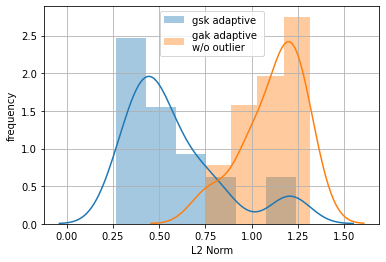

In [19]:
pde_5_data_ex2_10_6_wo = []
for a in pde_5_data_ex2_10_6:
    if a < 100:
        pde_5_data_ex2_10_6_wo.append(a)

ax = sns.distplot(pde_5_data_ex3a_10_6, label="gsk adaptive")
ax = sns.distplot(pde_5_data_ex2_10_6_wo, label="gak adaptive \nw/o outlier")
ax.set(xlabel='L2 Norm', ylabel='frequency')
plt.legend()
plt.grid()
plt.savefig("pde5_adaptive_histogram.pdf", bbox_inches='tight')
plt.show()

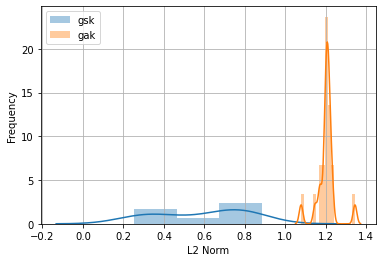

In [20]:
ax = sns.distplot(pde_5_data_ex3_10_6, label="gsk")
ax = sns.distplot(pde_5_data_ex1_10_6, label="gak")
ax.set(xlabel='L2 Norm', ylabel='Frequency')
plt.legend()
plt.grid()
plt.savefig("pde5_non-adaptive_histogram_L2.pdf", bbox_inches='tight')
plt.show()

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


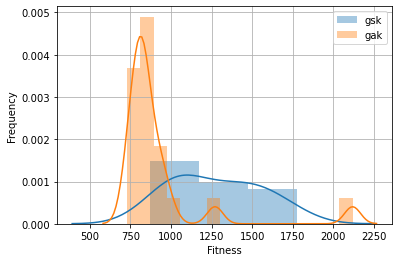

In [55]:
path = "D:/Nicolai/MA_Data/experiment_3/"
cipde5_ex3_10_6 = []
for i in range(20):
    cipde5_ex3_10_6.append(pp.loadExpObject(path + "cipde5_mpjgsk_rep_" + str(i) + ".json"))
    print(i/20)

cipde5_ex3_10_6_fit = []
for c in cipde5_ex3_10_6:
    cipde5_ex3_10_6_fit.append(np.min(c["fit_history"][-1]))
    
path = "F:/FHV/Masterthesis/data_backup/MA_Data/experiment_1/"
cipde5_ex1_10_6 = []
for i in range(20):
    cipde5_ex1_10_6.append(pp.loadExpObject(path + "cipde5_mpj_rep_" + str(i) + ".json"))
    print(i/20)
    
cipde5_ex1_10_6_fit = []
for c in cipde5_ex1_10_6:
    cipde5_ex1_10_6_fit.append(np.min(c["fit_history"][-1]))

ax = sns.distplot(cipde5_ex3_10_6_fit, label="gsk")
ax = sns.distplot(cipde5_ex1_10_6_fit, label="gak")
ax.set(xlabel='Fitness', ylabel='Frequency')
plt.legend()
plt.grid()
plt.savefig("pde5_non-adaptive_histogram_fit.pdf", bbox_inches='tight')
plt.show()

L2 norm worst: 0.883868903919597


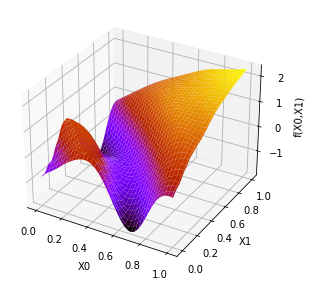

L2 norm best: 0.25257478012458723


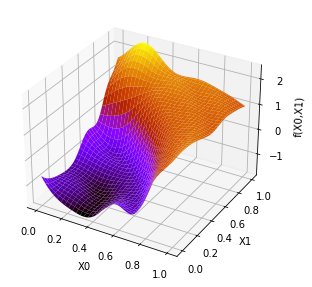

In [9]:
pde5_ex3_solution = []
for i in range(20):
    pde5_ex3_solution.append(cipde5_ex3_10_6[i]["normL2"])

best_index = np.argmin(pde5_ex3_solution)
worst_index = np.argmax(pde5_ex3_solution)
print("L2 norm worst: " + str(pde5_ex3_solution[worst_index]))
pp.plotApprox3D(gsk.KernelGSin(), cipde5_ex3_10_6[worst_index]["sol_kernel"], 0, 1, name="pde5_worst_solution_non-adaptive.pdf")
print("L2 norm best: " + str(pde5_ex3_solution[best_index]))
pp.plotApprox3D(gsk.KernelGSin(), cipde5_ex3_10_6[best_index]["sol_kernel"], 0, 1, name="pde5_best_solution_non-adaptive.pdf")

L2 norm worst: 1.2392540998120216


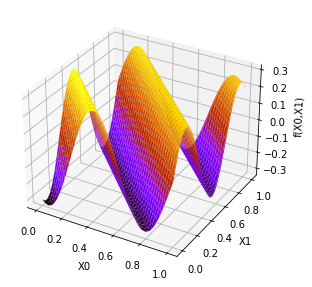

L2 norm best: 0.2692958991539698


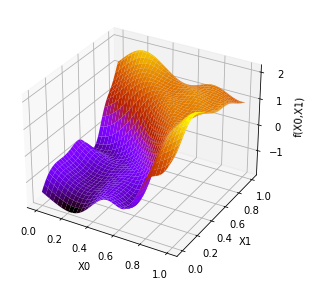

In [10]:
pde5_ex3a_solution = []
for i in range(20):
    pde5_ex3a_solution.append(cipde5_ex3a_10_6[i]["normL2"])

best_index = np.argmin(pde5_ex3a_solution)
worst_index = np.argmax(pde5_ex3a_solution)
print("L2 norm worst: " + str(pde5_ex3a_solution[worst_index]))
pp.plotApprox3D(gsk.KernelGSin(), cipde5_ex3a_10_6[worst_index]["sol_kernel"], 0, 1, name="pde5_worst_solution_adaptive.pdf")
print("L2 norm best: " + str(pde5_ex3a_solution[best_index]))
pp.plotApprox3D(gsk.KernelGSin(), cipde5_ex3a_10_6[best_index]["sol_kernel"], 0, 1, name="pde5_best_solution_adaptive.pdf")

# PDE 0B Evaluation

0.02687268262482114
[[ 1.32137723e+00  1.15464274e+00  3.62982990e-02  5.32111894e-02]
 [ 1.29967071e+00  1.17313518e+00 -3.63828727e-02 -4.85780286e-02]
 [ 6.83875557e-01  6.50013460e-02  1.62203175e-03  4.58624498e-02]
 [-1.08235153e+00  3.18040553e-01  1.87416054e-03  2.03199152e-02]
 [-2.21489334e+00  2.76374628e+00 -1.69307644e-04  4.94061325e-04]]


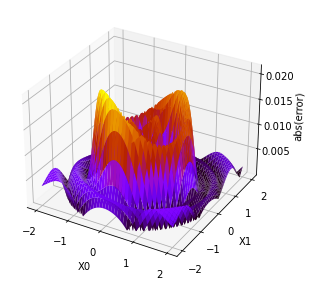

0.05410235184755307
[[ 2.07962607e-01 -6.15305288e-02  1.22677449e-04  4.79855705e-05]
 [ 2.83663766e+03  1.61285655e+00 -9.70570650e-05  1.95097135e-05]
 [-8.62263200e+02  1.57111593e+00 -1.04210835e-04  1.89619982e-05]
 [-1.97456916e+03  1.63258623e+00 -9.39996896e-05  1.97214584e-05]]


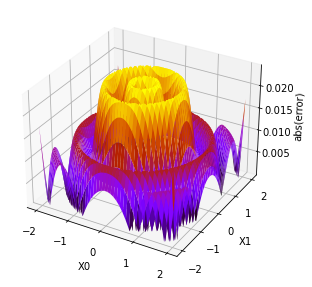

0.005473304575547598
[[-3.86873499e-01  1.32571870e+00 -3.38102494e+00  2.49834467e+00
  -8.07500698e-01  6.75043922e-01]
 [-5.56414870e-01  6.05754842e-01  1.33312651e-03 -3.93412105e-03
   7.34580981e-01  2.19038565e+00]
 [ 1.27189597e+00  2.70495873e+00 -1.25947946e-04  4.62113691e-04
   1.84215291e+00  1.01695416e+00]
 [-5.93340193e-01  8.27987781e-02  4.56534754e-03 -7.87111054e-03
   1.81012296e-01 -3.17423658e+00]
 [-1.42509981e+00  1.14982496e+00 -1.91377875e-04 -1.97955159e-03
   3.42913511e-01  4.41138179e-01]]


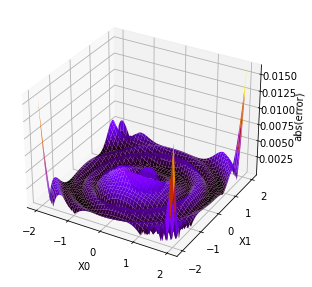

0.025130163579841193
[[-2.66546778e-01 -1.05205213e-01  6.23016426e-03  5.58782705e-04
   3.31373297e-03 -5.62868903e+00]
 [-3.16010388e+00  1.90577141e+00  3.76546827e-04  2.34932169e-04
  -8.82199209e-01 -5.44460685e-02]
 [ 5.13478440e+01  4.38744968e-01 -3.02939072e+00  7.24121919e+00
  -1.17113871e+01  5.39650217e+01]
 [-2.95081099e-02  9.99135094e-01 -1.33490185e-02 -8.89523383e-03
  -2.96537316e+00 -5.79760439e+00]]


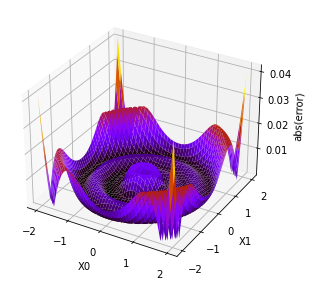

In [29]:
pde0B_ex1_best_index = np.argmin(pde_0B_data_ex1_10_6)
pde0B_ex2_best_index = np.argmin(pde_0B_data_ex2_10_6)
pde0B_ex3_best_index = np.argmin(pde_0B_data_ex3_10_6)
pde0B_ex3a_best_index = np.argmin(pde_0B_data_ex3a_10_6)

print(cipde0b_ex1_10_6[pde0B_ex1_best_index]["normL2"])
print(cipde0b_ex1_10_6[pde0B_ex1_best_index]["sol_kernel"])
pp.plotABSError3D(gak.KernelGauss(), cipde0b_ex1_10_6[pde0B_ex1_best_index]["sol_kernel"], "<class 'CiPde0B.CiPde0B'>", -2, 2, "pde0b_ex1_abs_error.pdf")
print(cipde0b_ex2_10_6[pde0B_ex2_best_index]["normL2"])
print(cipde0b_ex2_10_6[pde0B_ex2_best_index]["sol_kernel"])
pp.plotABSError3D(gak.KernelGauss(), cipde0b_ex2_10_6[pde0B_ex2_best_index]["sol_kernel"], "<class 'CiPde0B.CiPde0B'>", -2, 2, "pde0b_ex2_abs_error.pdf")
print(cipde0b_ex3_10_6[pde0B_ex3_best_index]["normL2"])
print(cipde0b_ex3_10_6[pde0B_ex3_best_index]["sol_kernel"])
pp.plotABSError3D(gsk.KernelGSin(), cipde0b_ex3_10_6[pde0B_ex3_best_index]["sol_kernel"], "<class 'CiPde0B.CiPde0B'>", -2, 2, "pde0b_ex3_abs_error.pdf")
print(cipde0b_ex3a_10_6[pde0B_ex3a_best_index]["normL2"])
print(cipde0b_ex3a_10_6[pde0B_ex3a_best_index]["sol_kernel"])
pp.plotABSError3D(gsk.KernelGSin(), cipde0b_ex3a_10_6[pde0B_ex3a_best_index]["sol_kernel"], "<class 'CiPde0B.CiPde0B'>", -2, 2, "pde0b_ex3a_abs_error.pdf")

In [29]:
cipde0b_ex3a_10_6_kernelnr = []
for c in cipde0b_ex3a_10_6:
    cipde0b_ex3a_10_6_kernelnr.append(c["sol_kernel"].shape[0])
    
cipde0b_ex3a_10_6_l2norm = []
for c in cipde0b_ex3a_10_6:
    cipde0b_ex3a_10_6_l2norm.append(c["normL2"])

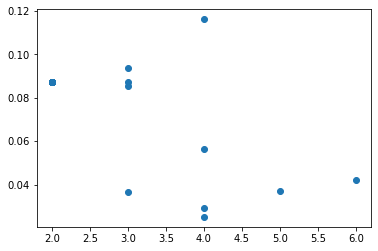

In [31]:
plt.scatter(cipde0b_ex3a_10_6_kernelnr, cipde0b_ex3a_10_6_l2norm)

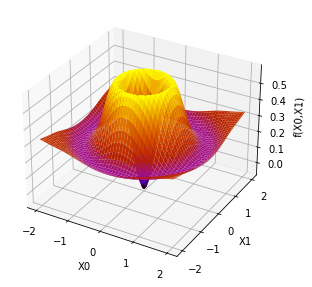

[[ 2.65742807e-01 -2.89195185e-02  4.71420158e-06  4.99561123e-05
   1.48372857e-01  5.85786494e+00]
 [-2.35751289e+00  1.87131783e+00  4.49212034e-07 -1.91483319e-05
  -1.24873567e+00 -5.18051432e-02]
 [-5.59596661e-02  4.50875389e-01  6.61635640e-06 -3.54388555e-05
   1.76459004e+00 -1.31974097e+00]
 [ 3.93678807e-01  1.34235472e+00  5.60282059e-01  5.34967478e+00
   2.59204801e-02 -2.27151458e-01]]


In [34]:
pde0B_ex3a_worst_index = np.argmax(pde_0B_data_ex3a_10_6)
pp.plotApprox3D(gsk.KernelGSin(), cipde0b_ex3a_10_6[pde0B_ex3a_worst_index]["sol_kernel"], -2, 2)
print(cipde0b_ex3a_10_6[pde0B_ex3a_worst_index]["sol_kernel"])

# PDE 6 Evaluation

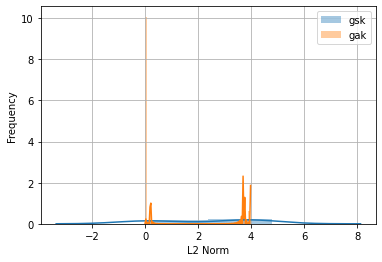

In [51]:
ax = sns.distplot(pde_6_data_ex3a_10_6, label="gsk")
ax = sns.distplot(pde_6_data_ex1_10_6, label="gak")
ax.set(xlabel='L2 Norm', ylabel='Frequency')
plt.legend()
plt.grid()
# plt.savefig("pde6_non-adaptive_histogram_L2.pdf", bbox_inches='tight')
plt.show()

In [53]:
pp.statsWilcoxon(pde_6_data_ex3a_10_6, pde_6_data_ex1_10_6)

'sig. worse'

In [52]:
pde_6_data_ex3a_10_6

[0.0018300400049553996,
 3.9708987387182413,
 4.019244797065546,
 0.03056065860645766,
 3.971322631041679,
 1.9240331589280972e-08,
 0.016257686193075924,
 3.8566137940268783,
 0.5472677742903423,
 3.9115192165819668,
 1.9261861008676768,
 4.122441152112246,
 3.6971865804468926,
 0.026722580378243894,
 3.7271771177538313,
 3.6027546552154908,
 3.1582676733431173e-09,
 0.0028417516590381834,
 4.769159709158197,
 3.685891239565066]

[[ -8.7853965  130.7061387    0.50031324   0.50024611   5.27880602
   -5.44743082]
 [ 12.6560969   13.351962     0.5093171    0.50327447   2.36318609
   -2.46034356]
 [ -4.80518183   0.4525918    3.18927346  -1.34132126  -2.40878508
   -0.74586098]
 [ -0.47361557   0.79288085   0.54084399  -1.56804804   7.02476227
   -8.5460759 ]
 [  1.95384392   0.88374054   0.54734161   0.49693006  -6.57572997
   -2.00337836]]


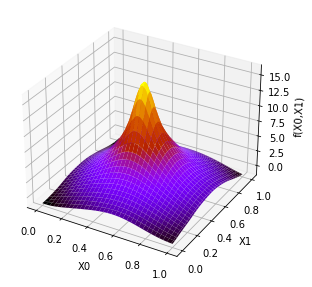

[[ -0.79731498   0.2082469   -0.80189882   0.98245994  -3.63226461
    7.18337429]
 [ -8.89112386 118.50238787   0.49991615   0.49953976   3.79835975
    7.2718551 ]
 [  8.96480515   1.67102852   0.36890283   0.63033501   1.84008394
   -2.23869733]
 [ 15.25776406   0.95900244  -0.19840122   1.87264534   2.15892106
   -1.53696809]
 [ -6.52341798   0.76989167  -0.70777848  -0.3641034   -2.72861758
    1.2220679 ]]


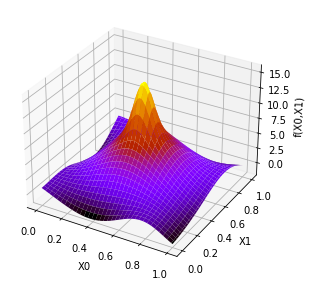

[[-11.71941778   0.24217413   3.75866703   0.7685131    0.87387468
   -0.66981307]
 [ -2.7404548    2.0375017   -1.16512666  -2.22874984   5.23260612
    0.34883064]
 [-32.714279    31.01603256   0.49138311   0.48760584   4.31093447
    0.21826291]
 [ -1.15576419   0.6283098    0.29036221  -1.80300121  -8.40073852
    0.49570331]
 [ -1.68406994   0.78778927  -1.28773888  -0.5077347   -4.62173587
   -0.8701579 ]]


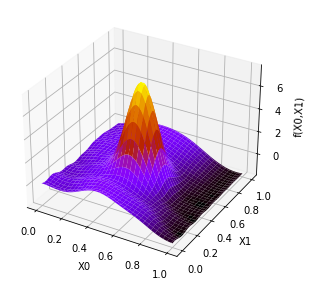

[[ 25.24932774   0.2766531    0.90798095   5.76341766  -4.9971328
   -2.81362197]
 [ 12.13025196   0.18687463  -2.03929408   2.18610102   1.09679954
  -22.42134269]
 [  4.75943308   0.44294901  -0.45974816  -0.51912895   2.43903594
   -2.91304352]
 [  5.74105735   0.23683543   0.44425718  -0.62904054  -1.29410873
   -9.82977516]
 [-10.69557149 120.69046513   0.49997479   0.49991626  -1.43511138
    2.38033355]]


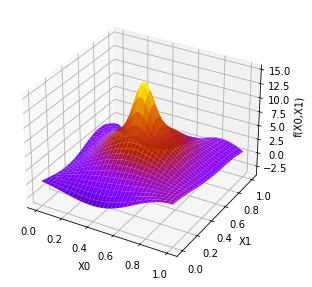

[[ -0.76396455   0.83722764   1.54708236  -0.16670315  -4.75472882
   -0.11544661]
 [-20.38340975 107.63507182   0.49996467   0.50176459   4.64484854
    0.38489075]
 [-14.53657546   4.8839578    0.51058965   0.48205239  -1.67400173
   -3.7572196 ]
 [  1.90285407   0.82620044   1.1570928   -1.21765456  -3.43834861
   -1.26298017]
 [ -2.56877977   0.20769195  -3.83091787   3.28766802  -3.64661771
   -1.36287301]]


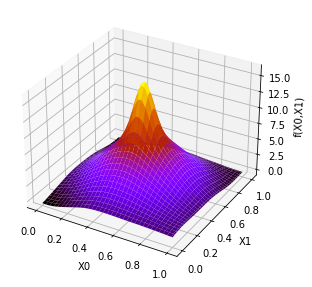

[[ 3.85366671  0.26872043  0.57852499  3.85542487  3.01965121 -4.89101155]
 [23.92453519 19.2751265   0.49796912  0.50828056 -4.7728457   5.97339378]
 [ 1.08626332  0.17753901 -2.79799559  1.40788325 -3.27292197 -2.45254817]
 [-5.28843251  0.08209528  0.78494789  1.68210603 -1.46011781 -0.56896911]
 [ 1.00685102  0.28764517 -0.58716383  2.7016293   4.34512267 -0.09816205]]


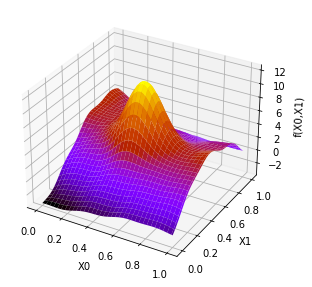

[[-8.55601367e+00  1.34075303e+00  6.51476077e-01 -1.86590479e+00
  -1.26248801e+01  1.02638578e-01]
 [-2.33862576e+00  5.77922527e-01  1.03688593e+00 -6.68860039e-01
   3.13239633e+00  7.33058215e-02]
 [ 2.49016630e+00  9.72264036e-01  2.78385770e-02  1.50293471e+00
  -4.36769224e+00 -3.55810456e-01]
 [ 2.11011876e+01  1.04816358e+02  5.00645995e-01  4.98967658e-01
   4.93799959e+00 -9.05896695e+00]
 [ 1.10190697e+01  5.38753622e-01  1.44331219e+00  9.08807723e-01
   1.88682430e+00  1.32659501e+01]]


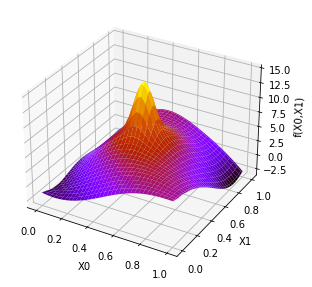

[[-1.57684080e-01 -4.96759526e-02  2.53146607e+00  2.59223833e+00
  -2.75202428e+00 -2.92547108e+00]
 [-1.88806745e+00  1.30532079e-01 -3.13431205e+00  1.52954838e-01
  -2.45568117e+00 -1.56696187e-02]
 [ 1.02971813e+00  1.38168960e-01 -2.49442431e+00  1.76474697e+00
   3.05143588e+00 -5.41127048e-01]
 [ 1.34369643e+00  5.72203169e-01  3.67077918e-01 -1.17884093e+00
   4.91539415e+00  3.89043121e-01]
 [ 2.05141404e+01  1.25042553e+01  4.90081570e-01  4.92174523e-01
  -1.95231925e+00 -4.93541361e-01]]


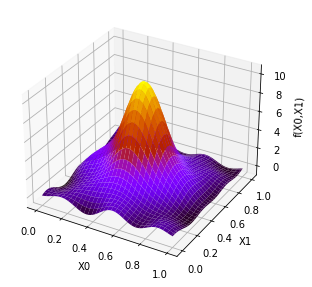

[[ 3.80644779e+00  6.03835233e-01  1.46972798e-01 -1.79812168e-02
  -2.59626934e+00  9.94970237e+00]
 [-3.32138483e+01  1.00233131e+02  5.00006919e-01  5.00320580e-01
  -3.09122108e+00  2.89903440e+00]
 [-4.73105573e+00  7.42150052e-01 -5.42489113e-01 -2.39627355e-01
   2.85154208e+00  3.60327168e-01]
 [ 4.41190047e+00  1.65472731e-01  1.72491847e+00 -9.93022400e-01
  -1.65413075e+00 -1.63058022e+00]
 [-1.05000005e-01  8.03372402e-02 -2.13064475e+00 -2.21636356e+00
  -5.84053042e+00  1.96555623e-01]]


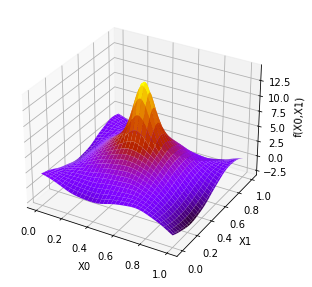

[[ 1.40441416e+01  4.80998515e-01  2.37738161e+00 -4.95224836e-01
  -1.11662102e+00  6.06962700e+00]
 [-5.31936714e+00  1.21261095e-01  7.92638973e-02 -1.42545034e+00
   1.28540217e+00  5.77025068e-01]
 [ 3.01482016e+00  4.65004181e-01 -7.54245061e-01  1.29184901e+00
   2.89696232e+00  4.84724697e+00]
 [-1.33002264e+01  1.17871418e+02  4.99325611e-01  4.99077634e-01
   2.97511483e+00  6.86964363e+00]
 [ 1.40662375e+00  1.85438031e-01 -8.18445921e-01 -6.01448123e-02
  -2.87669503e+00 -9.39773216e-01]]


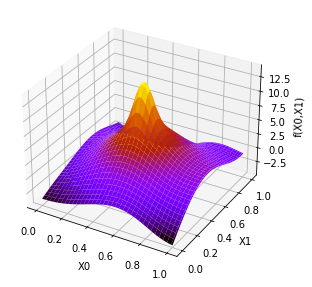

[[ 1.81719475e+01  7.18927535e+00  4.87290958e-01  5.29441112e-01
  -1.98981818e+00 -5.87976475e-01]
 [ 3.42598381e+00  2.69487683e-01 -2.26035811e+00  1.20836048e+00
   2.55775936e+00  6.76563427e+00]
 [ 2.39481410e+00  1.18927586e+00  9.29992925e-01  1.58004161e+00
   6.84641123e+00  1.87732251e+00]
 [-1.28399164e+00  3.47945165e-01  1.03008236e-02  2.22175096e+00
  -4.41740556e+00 -8.75399374e-02]
 [-2.92279492e+00  2.78909373e-01 -2.02938456e+00 -3.13968437e-01
  -3.10850675e+00  4.60516794e+00]]


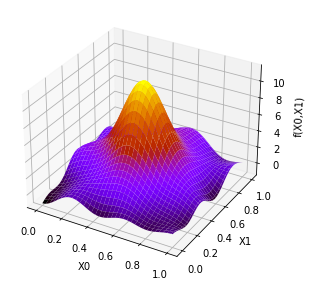

[[  13.47263719  120.61301681    0.5002853     0.50058725   -9.9902948
    12.07604887]
 [   3.29968595    0.61099022    1.48926929    4.16842679   13.17601343
    25.5225277 ]
 [  -8.46873693    7.43184841    0.51044189    0.5018086     0.51510931
   -48.85641115]
 [   2.99514483   18.35924589    0.49935614    0.49482003   15.51193615
  -103.10413532]
 [   2.27169837    0.4362637     0.39396029    0.45557018   -1.76315295
    -6.43974136]]


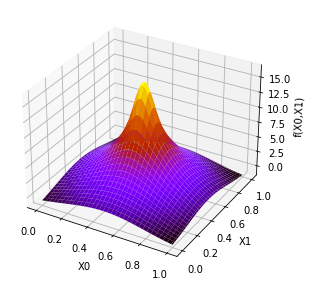

[[ -3.39301396   0.35755909   1.91584683  -1.09487903  -2.88213399
    6.74963105]
 [ -2.63592221   0.70079248  -1.15625273   0.85927773   5.47643653
   -1.0420428 ]
 [ -3.19918625   4.83869413   0.86695645   0.8469892  -13.38363085
    3.76986074]
 [  3.36160207   0.61179311   0.5189969    2.21339316  -4.3587212
   -2.01140922]
 [-17.15792886   4.9626783    0.53887161   0.5298478    2.07978285
    0.56664993]]


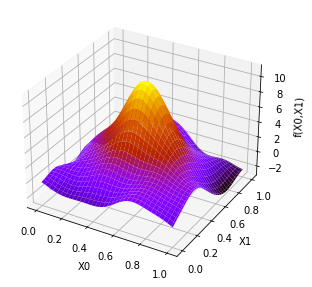

[[-11.06468794   0.44043607   0.63155605   1.82236918  -1.57165007
   -1.53306494]
 [  2.46309267   0.17791583   2.37024709  -1.64407777  -1.95017053
    1.00818358]
 [-11.21994058   0.31000054   1.28585896   3.95920743  -1.90554453
    2.47828073]
 [-19.98083085 120.30031115   0.50029488   0.50044753  -1.05047842
    2.76879286]
 [  4.76138619   0.58756391  -0.58735846   0.39784658   2.76333361
   39.76913779]]


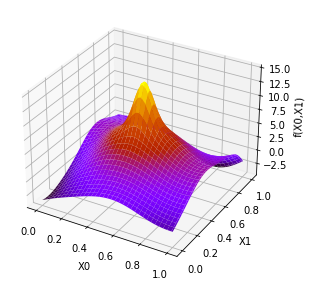

[[-9.10016701e+00  3.75357942e-01  8.95464032e-01 -7.27865614e-01
  -1.68201692e+00 -1.47119426e+00]
 [ 6.72990434e-01  3.40109481e-01 -1.81235002e+00 -1.76842856e+00
   6.84540368e+00 -5.28992066e+00]
 [ 1.28629591e+00  3.62214516e-01 -7.16885066e-01  9.78021119e-01
  -3.39644857e+00  4.91592391e+00]
 [ 5.14258971e+00  2.05711402e-01 -1.62045416e+00 -1.04231554e+00
  -1.58475520e+00 -6.64346506e-02]
 [-1.51551554e+01  1.15132213e+02  4.99175623e-01  4.99737322e-01
   1.41196682e+00  5.25068924e-01]]


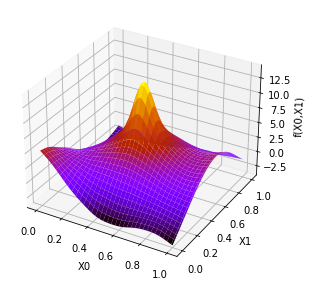

[[-6.20950522e+01  1.02616571e+02  5.00979268e-01  5.00068034e-01
  -9.35853761e+00  3.16511097e+00]
 [ 1.53514711e+01  4.12605026e+01  5.01118417e-01  5.00118259e-01
  -6.33606297e+00 -8.24630470e-01]
 [ 8.29277237e+00  6.52429067e-01  1.39304900e+00  1.07936253e+00
   1.94842439e+00 -5.29324841e+00]
 [ 4.78005875e+00  7.23226680e-01  4.29494585e-02  1.25496900e+00
   2.92270787e+00  1.14197110e+00]
 [-5.90147810e-01  2.39507320e+00  2.50944084e-01  9.81235755e-01
  -8.29115225e+00  1.32377251e+01]]


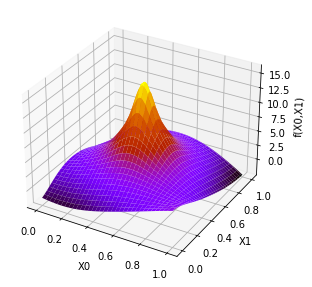

[[-1.55731197e+01  1.18700661e+02  5.00017275e-01  4.99502232e-01
  -4.03525277e-01 -3.64599558e+00]
 [ 9.77958975e+00  4.85920273e+00  5.22476505e-01  6.82061575e-01
   2.80658238e+00  4.07331370e+00]
 [-3.06749892e+00  8.57867782e-01  8.32840163e-01 -1.69700753e-01
  -4.06045297e+00  4.14373520e-02]
 [-6.50889693e+00  2.29283888e-01 -3.37404045e+00  4.10765713e+00
  -4.61820163e+00  3.53974747e+00]
 [-3.26364536e+00  2.44594353e-01 -6.11331162e-01 -9.10653279e-01
  -1.95825737e+00 -3.98897670e+00]]


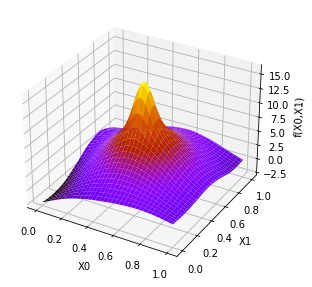

[[-7.18006829e-01  3.84611641e-01  2.79395402e+00  3.15861165e+00
  -6.31619452e+00 -1.07224854e+00]
 [-5.05666030e-01 -4.70969649e-01 -1.92232979e-01  1.09524058e+00
  -2.41213108e+00 -1.04519902e+00]
 [-6.12909589e+00  1.58397044e+00 -9.13239835e-01  1.65088839e+00
   4.43641971e+00  1.13636544e+01]
 [ 9.04856579e+00  1.44150868e+01  4.93391017e-01  5.10269128e-01
   1.78767701e-02  2.93127231e+01]
 [-1.28632764e+01  1.21979489e+02  4.99538703e-01  4.99460956e-01
  -6.70428742e+00 -3.67400007e+00]]


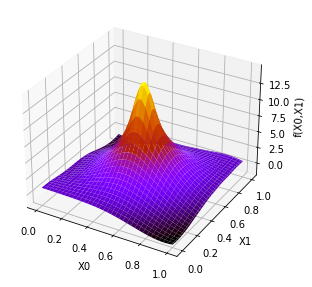

[[  2.93317606   0.44293378   0.42444533  -0.53091994   3.44300371
   -5.04429989]
 [-10.28044697 119.78630016   0.49982031   0.50087047  -2.98248498
    2.34912976]
 [-17.31983134   1.34383182   0.56408904   1.52623772   2.57317245
   -2.21224873]
 [ -5.36529766   1.19202928  -0.56894709   0.68650207   3.57706266
    0.16899697]
 [ -5.85075489   0.13540872  -0.56685373  -1.75639338   0.80367592
    5.96004697]]


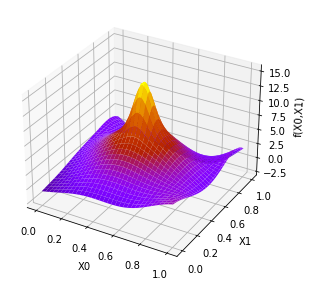

[[ 2.60321762e+00  3.24220409e-01 -3.38401811e+00 -9.43070850e-02
  -4.53245413e+00  3.97480210e-01]
 [-1.32796510e+01  1.14067022e+02  5.01027479e-01  5.00270691e-01
   1.23749781e+00  6.31288421e-01]
 [ 1.64327570e+01  3.34074122e+00  4.80753107e-01  5.07025315e-01
  -1.70769450e+00 -4.28638411e-01]
 [ 1.05586126e-01  2.45157420e-01 -1.72131165e+00  2.10647997e+00
  -8.06992861e+00  1.96399512e-01]
 [-5.64036232e+00  4.60189739e-01 -1.96130429e+00  1.52730597e+00
   2.14982502e+00 -1.33586466e+00]]


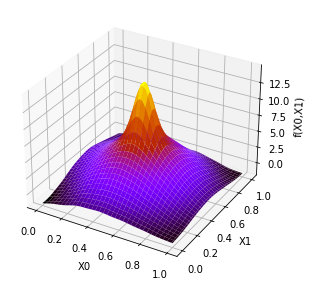

In [22]:
for c in cipde6_ex3_10_6:
    print(c["sol_kernel"])
    pp.plotApprox3D(gsk.KernelGSin(), c["sol_kernel"], 0, 1)

[[-0.79731498  0.2082469  -0.80189882  0.98245994 -3.63226461  7.18337429]]


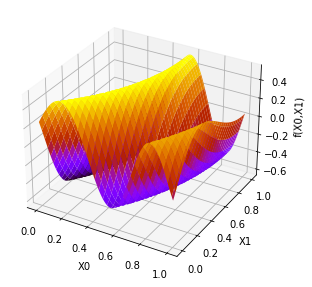

[[ -8.89112386 118.50238787   0.49991615   0.49953976   3.79835975
    7.2718551 ]]


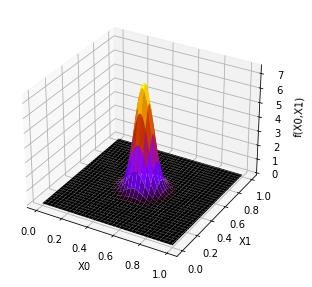

[[ 8.96480515  1.67102852  0.36890283  0.63033501  1.84008394 -2.23869733]]


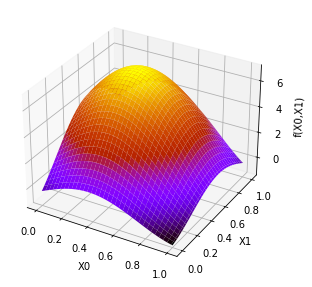

[[15.25776406  0.95900244 -0.19840122  1.87264534  2.15892106 -1.53696809]]


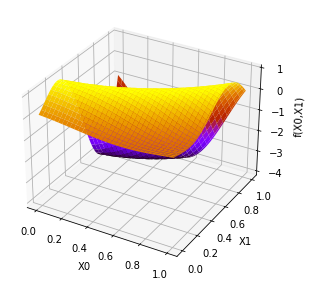

[[-6.52341798  0.76989167 -0.70777848 -0.3641034  -2.72861758  1.2220679 ]]


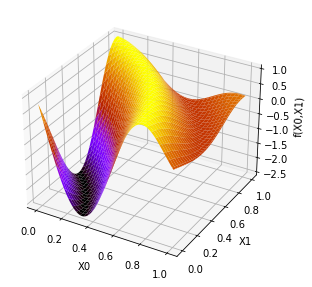

In [50]:
for i in range(5):
    print(np.array([cipde6_ex3_10_6[1]["sol_kernel"][i]]))
    pp.plotApprox3D(gsk.KernelGSin(), np.array([cipde6_ex3_10_6[1]["sol_kernel"][i]]), 0, 1)

In [31]:
-np.pi

-3.141592653589793

In [56]:
pp.statsWilcoxon(cipde5_ex3_10_6_fit, cipde5_ex1_10_6_fit)

'sig. worse'